# Lynxius Datasets

This notebook demonstrates how easy it is for subject matter experts and AI engineers to collaborate and continuously enhance the LLM evaluation pipeline using Lynxius Platform.

In [1]:
# First, we have to setup Lynxius API key
import os
import sys
from getpass import getpass
sys.path.append("../")

if not (lynxius_api_key := os.getenv("LYNXIUS_API_KEY")):
    lynxius_api_key = getpass("🔑 Enter your Lynxius API key: ")

os.environ["LYNXIUS_API_KEY"] = lynxius_api_key
os.environ["LYNXIUS_BASE_URL"] = "https://REQUEST-THE-ENDOINT-TO-GET-ACCESS"

🔑 Enter your Lynxius API key:  ········


In [3]:
# Let's use Lynxius to get all dataset entries we have so far!
from lynxius.client import LynxiusClient

client = LynxiusClient()
# We get dataset_id from the Lynxius online platform
dataset_details = client.get_dataset_details(dataset_id="6e83cec5-d8d3-4237-af9e-8d4b7c71a2ce")

As simple as that! When we saved the dataset, we stored the ground truth answers to those questions too. 

Now let's see how our LLM will manage to answer them.

In [4]:
# For the sake of simplicity, we have a dummy LLM implementation here
# It is meant to abstract your entire LLM application stack!
from datasets_utils import your_llm_application

# We'll use bert score and answer correctness evals
from lynxius.evals.bert_score import BertScore
from lynxius.evals.answer_correctness import AnswerCorrectness

bert_score = BertScore("PR #1234", level="word", presence_threshold=0.65)
answer_correctness = AnswerCorrectness("PR #1234")

for entry in dataset_details.entries:
    query = entry.query
    ground_truth_output = entry.reference
    actual_output = your_llm_application(entry.query)

    # Add a sample to the evals
    bert_score.add_trace(reference=ground_truth_output, output=actual_output)
    answer_correctness.add_trace(query=query, reference=ground_truth_output, output=actual_output)

# Run!
client.evaluate(bert_score)
client.evaluate(answer_correctness)

'e8b4a1fd-81be-44d0-be1b-33138a842845'

Now we can head over to the Lynxius online platform to see the results of our evaluations:

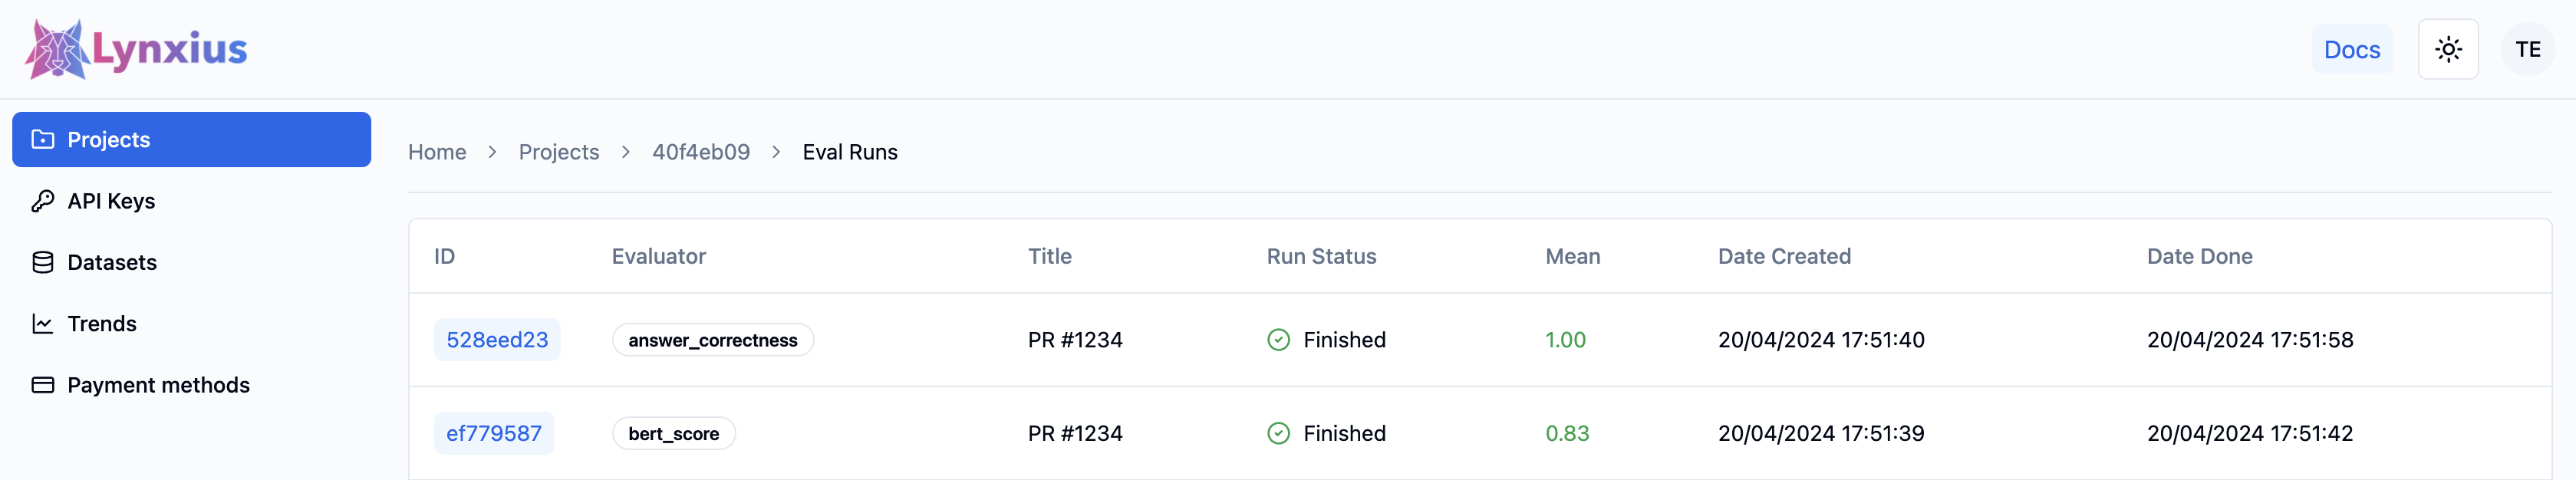

Looks like our LLM application is doing not too bad!

But now, one of our AI engineers or a subject matter expert decides to extend the set of test cases by adding a new one, that our LLM application should totally know how to handle. This task can be performed entirely in the user interface of the Lynxius online platform:

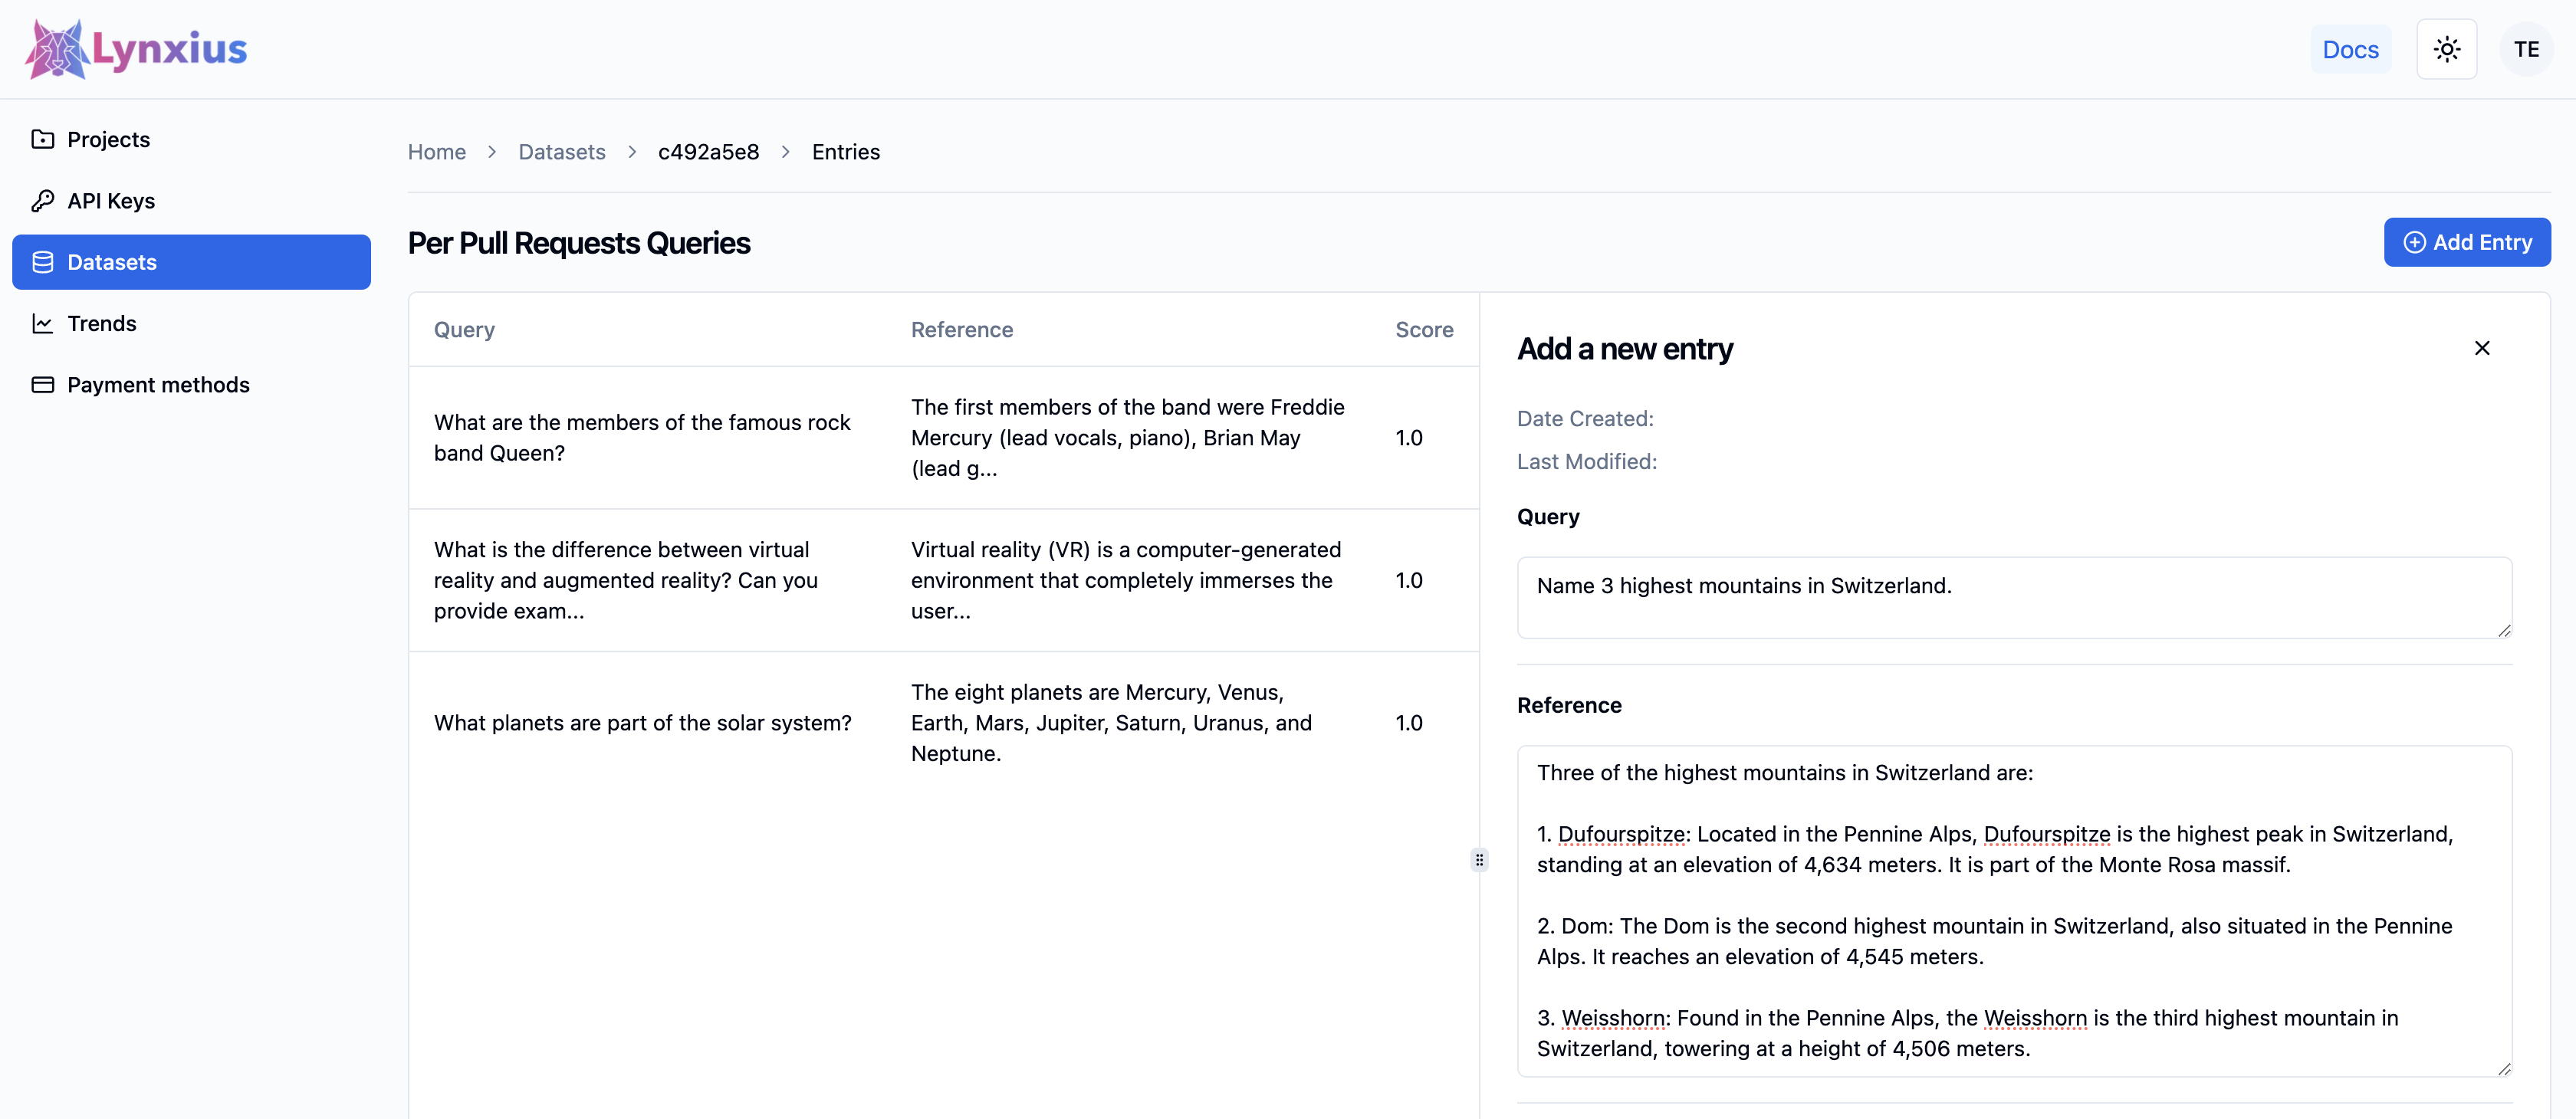

Now that the dataset has been extended we simply rerun the exact same code that queries dataset entries and runs the 2 evals against them. This is what we get:

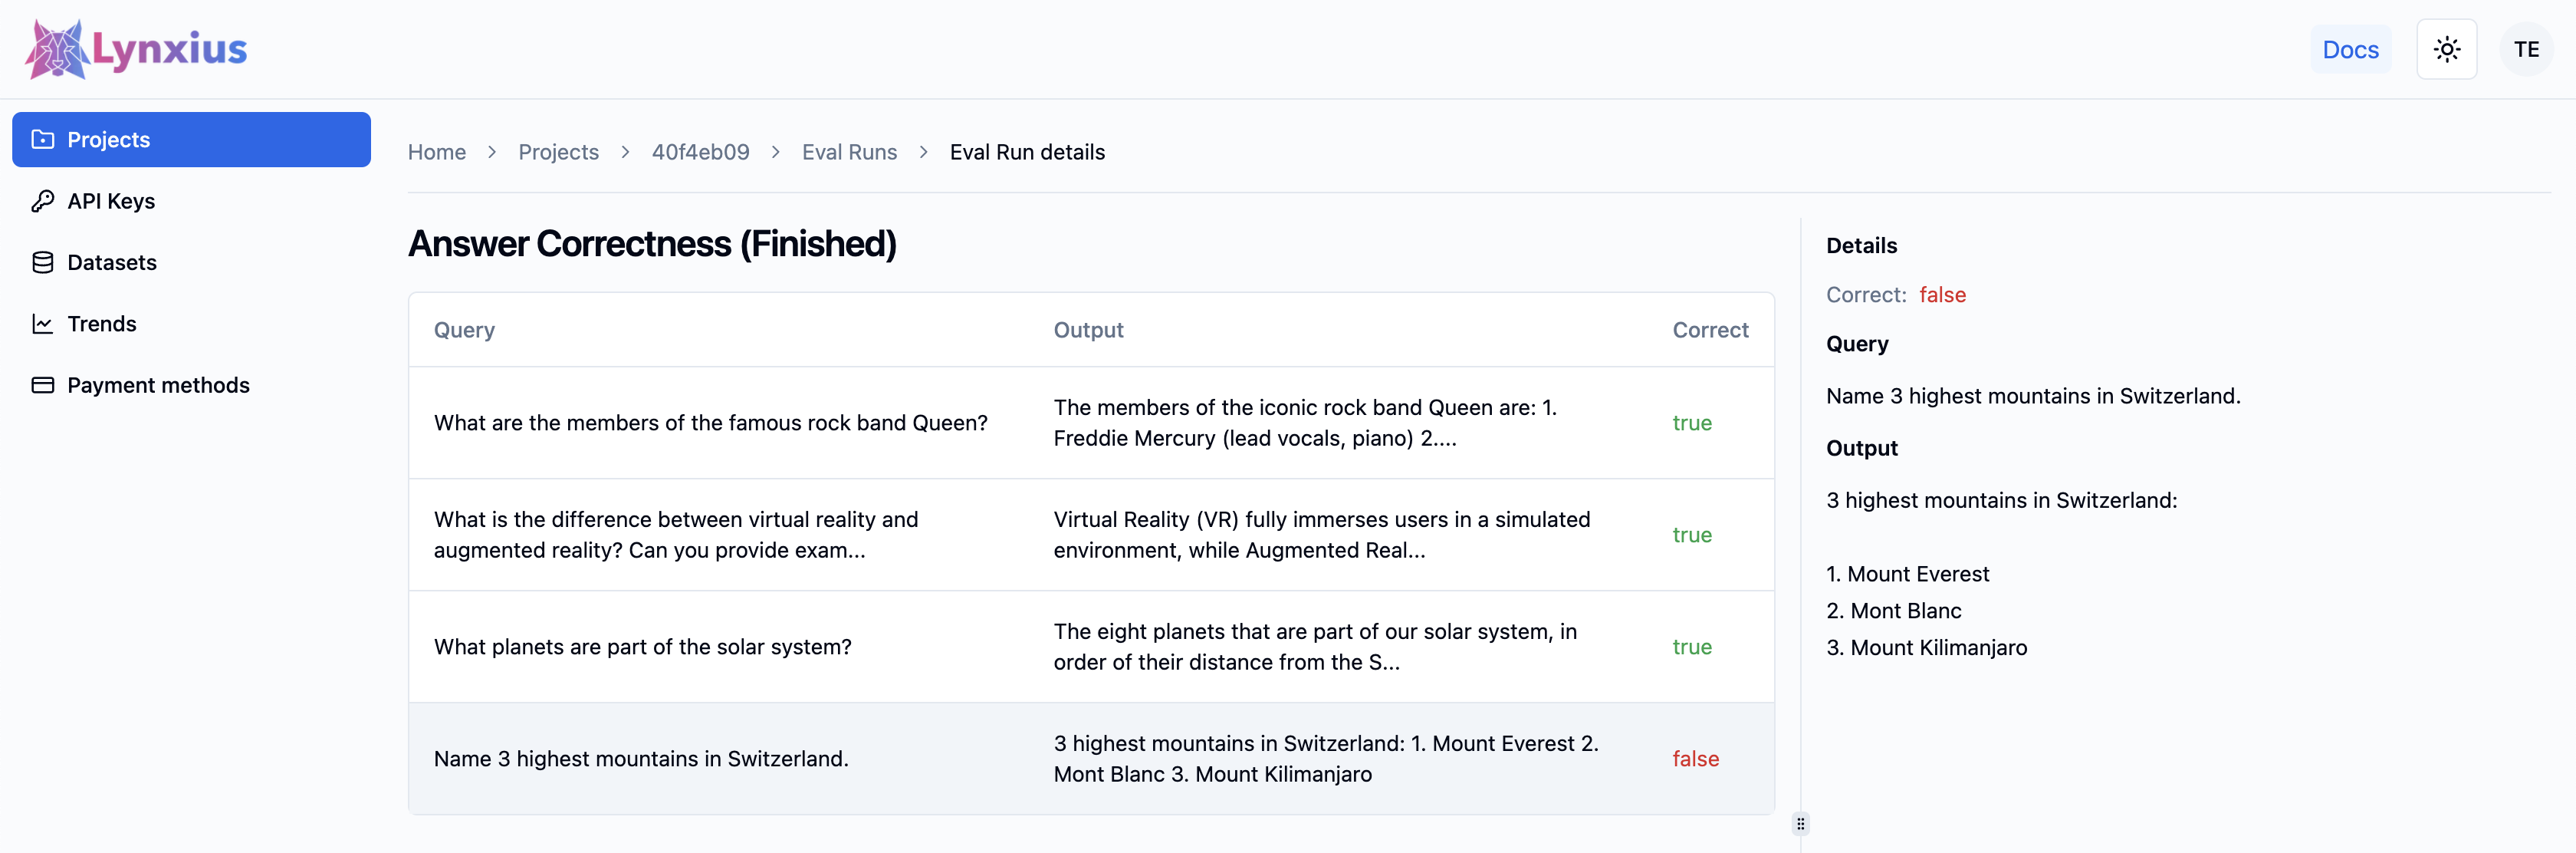

Yikes!!! Our LLM application didn't quite get this one right. Let's go ahead and fix it and run the test again.

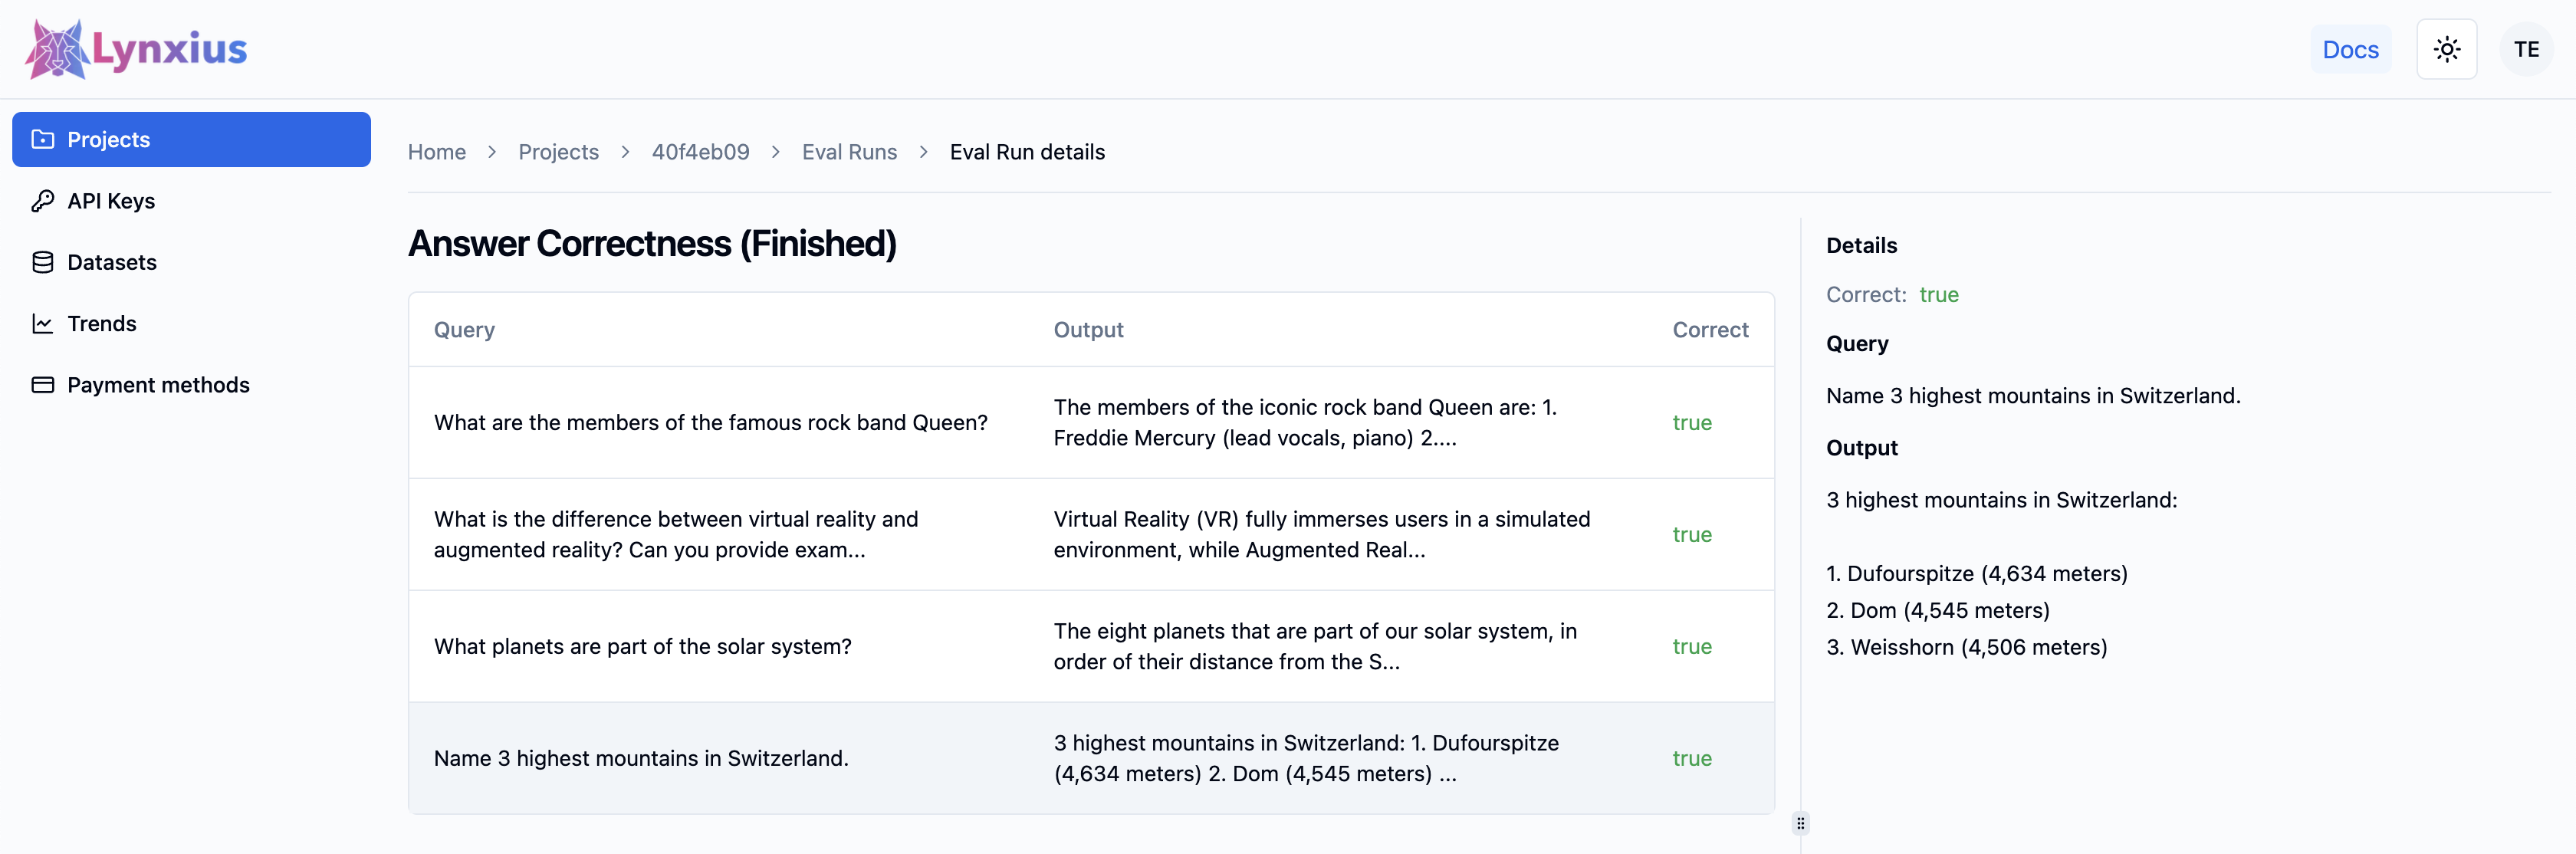

There we go! Much better!